[ 0.04379505 -0.03412741  0.02274452  0.98381663  0.01770467  0.05499675
 -0.04165029  1.9765795   0.01471177  0.95463468  2.00586447  0.02018267]
((2000, 1640), (2000, 6), (2000, 12))


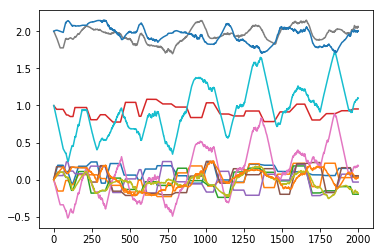

[40 40 40 ..., 30 30 30]


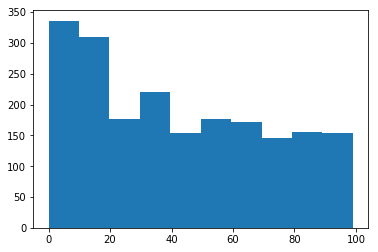

In [2]:
import cv2
import wrinkle2
import numpy as np
import matplotlib.pyplot as plt


debug_fag = False

# build the initial classifier
data = np.load('./1111-2344/data.npz')
tt_feat = data['tt_feat']
tt_pos = data['tt_pos']
tt_handles = data['tt_handles']


test_size = 2000;
print tt_handles[5,:]
tt_handles = tt_handles[:test_size,:]
tt_pos = tt_pos[:test_size,:]
tt_feat = tt_feat[:test_size,:]
print(tt_feat.shape, tt_pos.shape, tt_handles.shape)


for i in range(0,12):
    plt.plot(range(len(tt_handles)),tt_handles[:,i])
plt.show()
# cluster the pos position:
# give labels
num_class = 100
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_class, random_state=0).fit(tt_handles)
labels = kmeans.labels_
print labels

plt.hist(labels)
plt.show()

from sklearn.ensemble import RandomForestClassifier
# using labels to construct the random trees
clf = RandomForestClassifier(n_estimators=12)
# n_estimators : integer, optional (default=10) The number of trees in the forest.
clf.fit(X=tt_feat, y=labels)

# Apply trees in the forest to X, return leaf indices in each estimator(decision tree)
tt_leaf = clf.apply(X=tt_feat)

    

In [17]:
import cv2
import wrinkle2
import numpy as np
import matplotlib.pyplot as plt

from rfdic import random_trees
    
data = np.load('./1110-2020/data.npz')
tt_feat = data['tt_feat']
tt_pos = data['tt_pos']
tt_handles = data['tt_handles']

test_size = 3000;
rt = random_trees(tt_handles=tt_handles[:test_size,:], 
                tt_pos=tt_pos[:test_size,:], 
                tt_feat = tt_feat[:test_size,:],
                num_class = 10,
                num_trees = 1)




actural leaf amount 148.0
leaf_amount 148
actual_id length 148
max leaf_id 147
H shape (3000, 148)


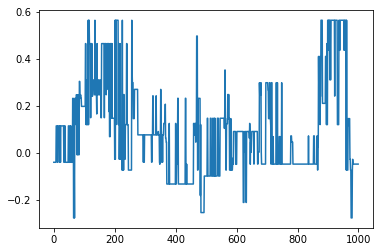

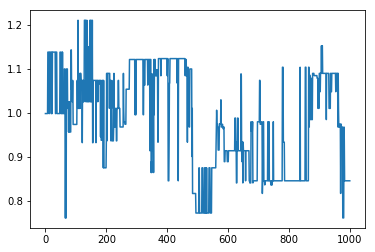

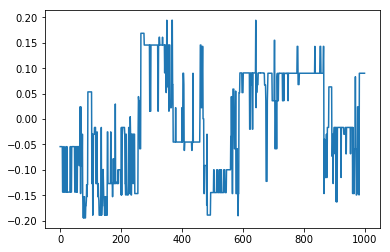

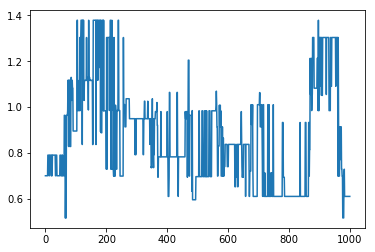

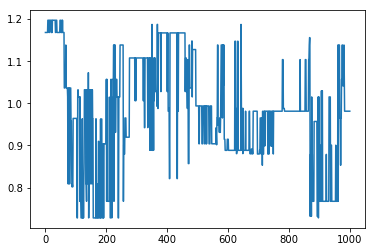

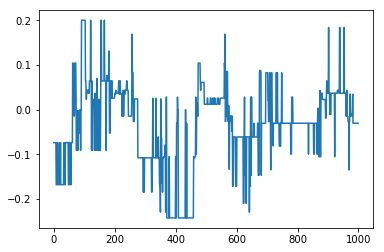

In [25]:
points = np.array([])
for ind in range(3000,4000):
    feat = tt_feat[ind,:]
    pos_true = tt_pos[ind,:]
    pos_avg = rt.feat_to_pos(feat = feat)
    pos_opt = rt.feat_to_act(feat = feat)
    point = np.array((pos_avg,pos_true,pos_opt)).ravel()
    points = np.vstack((points,point)) if points.size else point

# for each controlling parameters:
for i in range(tt_pos.shape[1]):
    x = range(len(points))
    #plt.plot(x,points[:,i+12])
    plt.plot(x,points[:,i])
    #plt.plot(x,points[:,i+6])
    plt.show()
